In [29]:
import numpy as np
import pandas as pd
from plotnine import *

In [30]:
df_train = pd.read_csv('trainData.csv')
df_train

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,359783,2009-10-16,6024,UDI,CGH,552,5.0,0,25,12,...,12,0,0,64,9,0,15:14:00,144.0,14102.1,73
999886,152315,2009-05-03,6669,LIM,HAV,3934,4.0,0,129,3,...,2,20,0,0,118,156,08:50:00,168.0,32907.8,274
999887,1000747,2011-04-04,9094,IQQ,SCL,1430,5.0,0,2,1,...,20,36,0,7,0,124,14:18:00,218.0,13519.3,131
999888,117952,2009-04-04,7704,GYE,SCY,1091,2.0,0,67,2,...,16,0,0,34,2,98,08:05:00,144.0,8729.6,134


# Limpieza de datos

In [31]:
# Eliminar columna Unnamed: 0; parece ser un identificador innecesario
df_train = df_train.drop(columns=["Unnamed: 0"])

Revisar datos faltantes:

In [32]:
df_train.isna().sum()
# La variable departure_time "hora programada de despegue" presenta datos nulos

date                  0
fligth_number         0
origin                0
destination           0
distance              0
noshow                0
denied_boarding       0
pax_midlow            0
pax_high              0
pax_midhigh           0
pax_low               0
pax_freqflyer         0
group_bookings        0
out_of_stock          0
dom_cnx               0
int_cnx               0
p2p                   0
departure_time     1418
capacity              0
revenues_usd          0
bookings              0
dtype: int64

Se tienen sólo 1418 valores faltantes en la variable 'departure_time'.
Consideramos que esta variable puede ser relevante para el trabajo, porque indica la hora en que debe salir el avión, y es probable que esto afecte en la cantidad de 'no show'. 
Como se tienen 999890 filas, consideramos que eliminar las 1418 filas con datos faltantes no significa una gran pérdida de datos, ya que es tan sólo el 0.14% de los datos, por lo que aplicamos esta solución

In [33]:
df_train = df_train.dropna(subset=['departure_time'])

In [34]:
df_train[['destination']].nunique()
#serian 159 aeropuertos como variable categoria, habria que transformarlo?

destination    157
dtype: int64

La variable 'denied_boarding' indica el número de pasajeros que no pudieron abordar por vuelo sobre reservado. 
Como el objetivo principal de este proyecto es estimar el número de no show en su vuelo, **antes** de que salga un vuelo, no se debería usar esta variable como predictora ¿?

In [35]:
df_train = df_train.drop(columns=['denied_boarding'])

# Variables numéricas

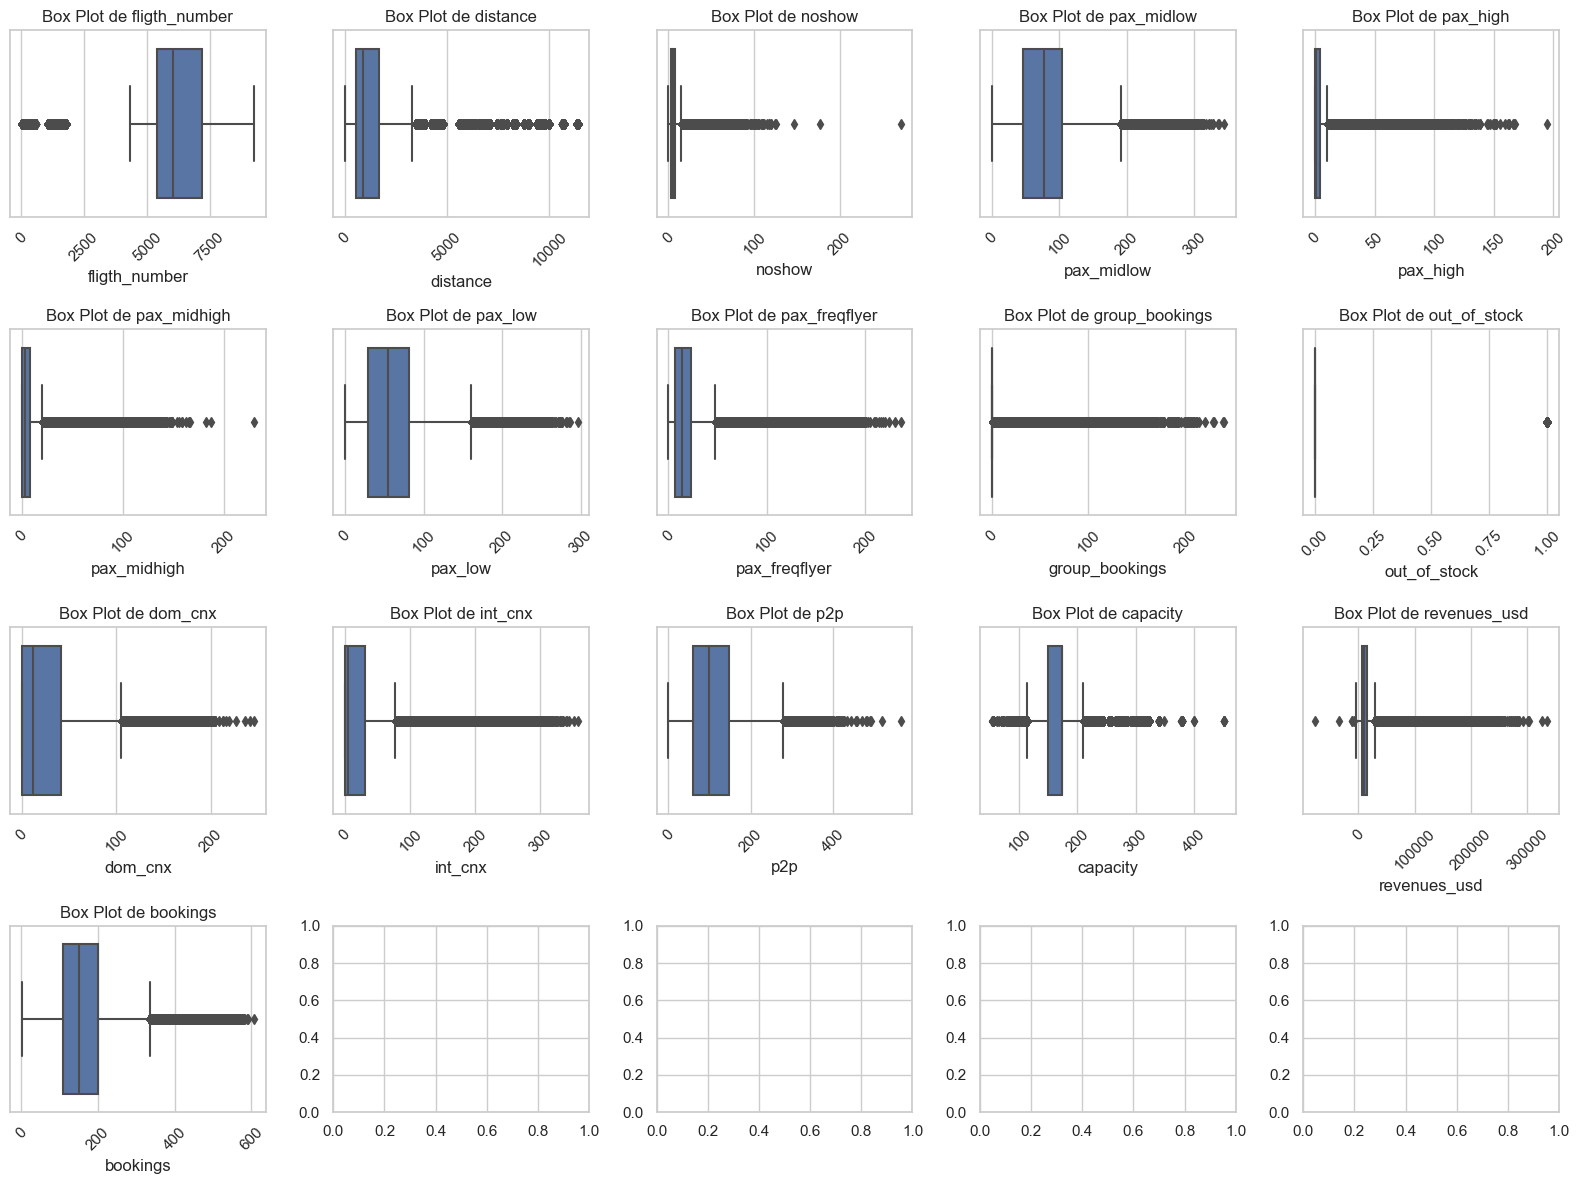

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_train.select_dtypes(include=['number']).columns
sns.set(style="whitegrid")
plots_per_row = 5
num_rows = (len(numeric_columns) + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, 3 * num_rows))

for i, column in enumerate(numeric_columns):
    row = i // plots_per_row
    col = i % plots_per_row
    sns.boxplot(data=df_train, x=column, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_title(f'Box Plot de {column}')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Podemos ver que en la variable 'revenues_usd' hay valores negativos. Estos probablemente son outliers, ya que esta variable indica ingresos en dólares, por lo que no deberían ser negativos. Como son sólo 7 valores, eliminaremos las filas que los contienen.

In [38]:
import pandas as pd
negative_revenues = df_train[df_train['revenues_usd'] < 0]
num_negative_values = len(negative_revenues)
print("Valores negativos en 'revenues_usd':")
print(negative_revenues['revenues_usd'])
print(f"Total de valores negativos: {num_negative_values}")
df_train = df_train[df_train['revenues_usd'] >= 0]

Valores negativos en 'revenues_usd':
15266    -11811.9
616862    -1487.8
685025   -34733.8
755252   -10553.2
791774    -4345.4
884149   -77206.9
892781    -8185.4
Name: revenues_usd, dtype: float64
Total de valores negativos: 7


La variable 'date' esta en un formato que no sirve para KNN-regressor.
Para predecir, no nos interesa realmente el año, no entrega info. para predecir (no vamos a volver a esos años)
El día del mes tampoco es relevante, considerando el problema. 
El mes podría contener información interesante, por ejemplo por las fechas que tienen más viajes como Navidad.

In [62]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['month'] = df_train['date'].dt.month